# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='images/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Processing...
Done!


Here we can see one of the images.

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

With the data loaded, it's time to import the necessary packages.

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [4]:
# TODO: Define your network architecture here
# Hyperparameters for our network
# Build a feed-forward network
input_size = 784
hidden_sizes = [400, 200, 100]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], output_size),
                      nn.Softmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=400, bias=True)
  (1): ReLU()
  (2): Linear(in_features=400, out_features=200, bias=True)
  (3): ReLU()
  (4): Linear(in_features=200, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=10, bias=True)
  (7): Softmax()
)


# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [6]:
# TODO: Create the network, define the criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01) #use stochastic gradient descent

In [7]:
# TODO: Train the network here
epochs = 30
print_every = 40
steps = 0
for e in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps += 1
        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        # Forward and backward passes
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() 
        
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0

Epoch: 1/30...  Loss: 2.3026
Epoch: 1/30...  Loss: 2.3022
Epoch: 1/30...  Loss: 2.3019
Epoch: 1/30...  Loss: 2.3016
Epoch: 1/30...  Loss: 2.3011
Epoch: 1/30...  Loss: 2.3006
Epoch: 1/30...  Loss: 2.3004
Epoch: 1/30...  Loss: 2.3000
Epoch: 1/30...  Loss: 2.2997
Epoch: 1/30...  Loss: 2.2991
Epoch: 1/30...  Loss: 2.2987
Epoch: 1/30...  Loss: 2.2982
Epoch: 1/30...  Loss: 2.2982
Epoch: 1/30...  Loss: 2.2969
Epoch: 1/30...  Loss: 2.2970
Epoch: 1/30...  Loss: 2.2965
Epoch: 1/30...  Loss: 2.2960
Epoch: 1/30...  Loss: 2.2952
Epoch: 1/30...  Loss: 2.2945
Epoch: 1/30...  Loss: 2.2935
Epoch: 1/30...  Loss: 2.2935
Epoch: 1/30...  Loss: 2.2926
Epoch: 1/30...  Loss: 2.2908
Epoch: 2/30...  Loss: 1.2597
Epoch: 2/30...  Loss: 2.2887
Epoch: 2/30...  Loss: 2.2885
Epoch: 2/30...  Loss: 2.2871
Epoch: 2/30...  Loss: 2.2846
Epoch: 2/30...  Loss: 2.2839
Epoch: 2/30...  Loss: 2.2817
Epoch: 2/30...  Loss: 2.2773
Epoch: 2/30...  Loss: 2.2762
Epoch: 2/30...  Loss: 2.2724
Epoch: 2/30...  Loss: 2.2678
Epoch: 2/30...

Epoch: 12/30...  Loss: 1.6669
Epoch: 13/30...  Loss: 1.0087
Epoch: 13/30...  Loss: 1.6681
Epoch: 13/30...  Loss: 1.6750
Epoch: 13/30...  Loss: 1.6727
Epoch: 13/30...  Loss: 1.6654
Epoch: 13/30...  Loss: 1.6659
Epoch: 13/30...  Loss: 1.6890
Epoch: 13/30...  Loss: 1.6771
Epoch: 13/30...  Loss: 1.6792
Epoch: 13/30...  Loss: 1.6691
Epoch: 13/30...  Loss: 1.6792
Epoch: 13/30...  Loss: 1.6667
Epoch: 13/30...  Loss: 1.6765
Epoch: 13/30...  Loss: 1.6861
Epoch: 13/30...  Loss: 1.6684
Epoch: 13/30...  Loss: 1.6737
Epoch: 13/30...  Loss: 1.6699
Epoch: 13/30...  Loss: 1.6684
Epoch: 13/30...  Loss: 1.6840
Epoch: 13/30...  Loss: 1.6675
Epoch: 13/30...  Loss: 1.6690
Epoch: 13/30...  Loss: 1.6764
Epoch: 13/30...  Loss: 1.6661
Epoch: 14/30...  Loss: 0.2542
Epoch: 14/30...  Loss: 1.6802
Epoch: 14/30...  Loss: 1.6766
Epoch: 14/30...  Loss: 1.6809
Epoch: 14/30...  Loss: 1.6677
Epoch: 14/30...  Loss: 1.6682
Epoch: 14/30...  Loss: 1.6662
Epoch: 14/30...  Loss: 1.6717
Epoch: 14/30...  Loss: 1.6741
Epoch: 14/

Epoch: 24/30...  Loss: 1.6644
Epoch: 24/30...  Loss: 1.6406
Epoch: 24/30...  Loss: 1.6455
Epoch: 24/30...  Loss: 1.6468
Epoch: 24/30...  Loss: 1.6575
Epoch: 24/30...  Loss: 1.6410
Epoch: 24/30...  Loss: 1.6483
Epoch: 24/30...  Loss: 1.6485
Epoch: 24/30...  Loss: 1.6570
Epoch: 25/30...  Loss: 0.3317
Epoch: 25/30...  Loss: 1.6486
Epoch: 25/30...  Loss: 1.6551
Epoch: 25/30...  Loss: 1.6591
Epoch: 25/30...  Loss: 1.6458
Epoch: 25/30...  Loss: 1.6414
Epoch: 25/30...  Loss: 1.6616
Epoch: 25/30...  Loss: 1.6659
Epoch: 25/30...  Loss: 1.6377
Epoch: 25/30...  Loss: 1.6390
Epoch: 25/30...  Loss: 1.6422
Epoch: 25/30...  Loss: 1.6623
Epoch: 25/30...  Loss: 1.6490
Epoch: 25/30...  Loss: 1.6402
Epoch: 25/30...  Loss: 1.6367
Epoch: 25/30...  Loss: 1.6453
Epoch: 25/30...  Loss: 1.6617
Epoch: 25/30...  Loss: 1.6511
Epoch: 25/30...  Loss: 1.6423
Epoch: 25/30...  Loss: 1.6470
Epoch: 25/30...  Loss: 1.6454
Epoch: 25/30...  Loss: 1.6522
Epoch: 25/30...  Loss: 1.6542
Epoch: 25/30...  Loss: 1.6575
Epoch: 26/

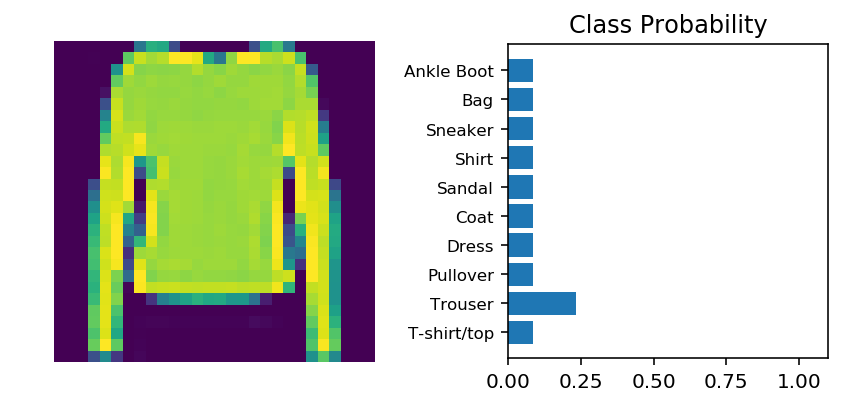

In [12]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.